In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import torch
import torch.optim as optim
import torchvision

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [20]:
def matrix_factorize(I,r,device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")):
    I = I.to(device)

    # Initialize the W and H matricies
    W = torch.randn(I.shape[0],r,device=device ,requires_grad=True)
    H = torch.randn(r,I.shape[1], device=device ,requires_grad=True)

    # Using gradient descent on W and H
    optimizer = optim.Adam([W, H], lr=0.01)
    mask = ~torch.isnan(I)

    threshold = 0.000001
    loss0 = np.inf
    loss1 = 0
    count = 0

    while abs(loss0 - loss1) > threshold:
        diff_matrix = torch.mm(W,H) - I
        diff_vec = diff_matrix[mask]
        loss = torch.norm(diff_vec)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss0,loss1 = loss1,loss
        if count % 500 == 0:
            print(count,"loss:",loss)
        count+=1

    # for i in range(1000):
    #     # Compute the loss
    #     diff_matrix = torch.mm(W, H) - I
    #     diff_vector = diff_matrix[mask]
    #     loss = torch.norm(diff_vector)
        
    #     # Zero the gradients
    #     optimizer.zero_grad()
        
    #     # Backpropagate
    #     loss.backward()
        
    #     # Update the parameters
    #     optimizer.step()

    #     if i % 100 == 0:
    #         print(i,"loss:",loss)
    
    
    return W,H,loss


In [21]:
def rmse(y,y_hat):
    rmse = np.sqrt(np.mean((y - y_hat) ** 2))
    return rmse

def psnr(y,y_hat):
    rmse_value = rmse(y,y_hat)
    if rmse==0:
        psnr == np.inf
    else:
        psnr = 20 * np.log10(1/rmse_value)
    return psnr

In [22]:
# Load image
img = torchvision.io.read_image("dog.jpg")
print(img.shape)

torch.Size([3, 1365, 2048])


In [23]:
#Normalize the image
img = (img - img.min()) / (img.max() - img.min())
print(img)

tensor([[[0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         [0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         [0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         ...,
         [0.4745, 0.4745, 0.4784,  ..., 0.3804, 0.3765, 0.3765],
         [0.4745, 0.4745, 0.4784,  ..., 0.3804, 0.3804, 0.3765],
         [0.4745, 0.4745, 0.4784,  ..., 0.3843, 0.3804, 0.3804]],

        [[0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         [0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         [0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         ...,
         [0.4039, 0.4039, 0.4078,  ..., 0.3216, 0.3176, 0.3176],
         [0.4039, 0.4039, 0.4078,  ..., 0.3216, 0.3216, 0.3176],
         [0.4039, 0.4039, 0.4078,  ..., 0.3255, 0.3216, 0.3216]],

        [[0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.1176],
         [0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.1176],
         [0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.

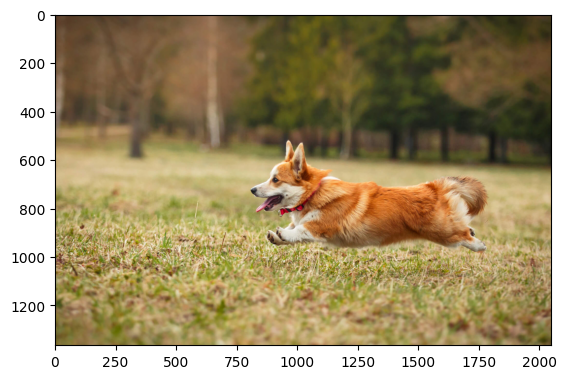

In [24]:
plt.imshow(img.permute(1,2,0))

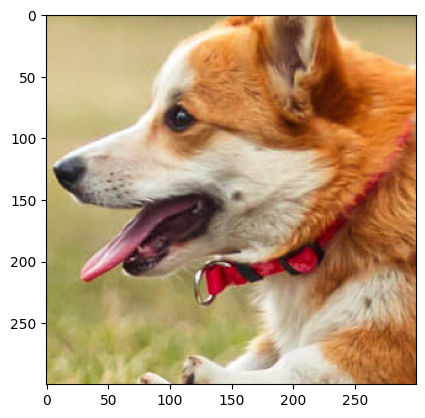

In [25]:
img = torchvision.transforms.functional.crop(img.cpu(), 600, 800, 300, 300)
plt.imshow(img.permute(1,2,0))

In [26]:
print(img.shape)

torch.Size([3, 300, 300])


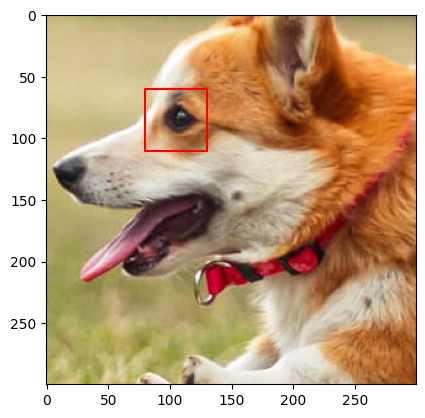

In [29]:
#Choosing a 50x50 patch
plt.imshow(img.permute(1,2,0), cmap='gray')
plt.plot([80,80],[60,110], color='r')
plt.plot([130,130],[60,110], color='r')
plt.plot([80,130],[60,60], color='r')
plt.plot([80,130],[110,110], color='r')
plt.show()

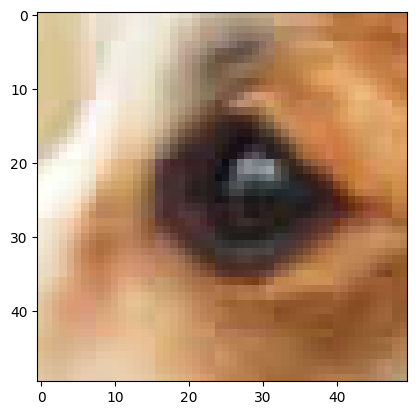

In [30]:
#Showing patch
patch = img[:,60:110,80:130]
plt.imshow( patch.permute(1,2,0))

MATRIX FACTORIZATION

In [31]:
rmse_array = []
pnsr_array = []


Matrix Factorisation for channel_0
0 loss: tensor(123.7092, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(2.5251, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(1.8454, grad_fn=<LinalgVectorNormBackward0>)
1500 loss: tensor(1.7301, grad_fn=<LinalgVectorNormBackward0>)
2000 loss: tensor(1.6133, grad_fn=<LinalgVectorNormBackward0>)
final loss for channel_0 is: tensor(1.6048, grad_fn=<LinalgVectorNormBackward0>)

Matrix Factorisation for channel_1
0 loss: tensor(127.1711, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(3.2144, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(2.1583, grad_fn=<LinalgVectorNormBackward0>)
final loss for channel_1 is: tensor(2.0410, grad_fn=<LinalgVectorNormBackward0>)

Matrix Factorisation for channel_2
0 loss: tensor(120.4577, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(2.9585, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(2.1826, grad_fn=<LinalgVectorNormBackward0>)
1500 loss: tensor(1.9089, grad_fn=<LinalgVe

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.035314113..1.0817337].


final loss for channel_2 is: tensor(1.7125, grad_fn=<LinalgVectorNormBackward0>)


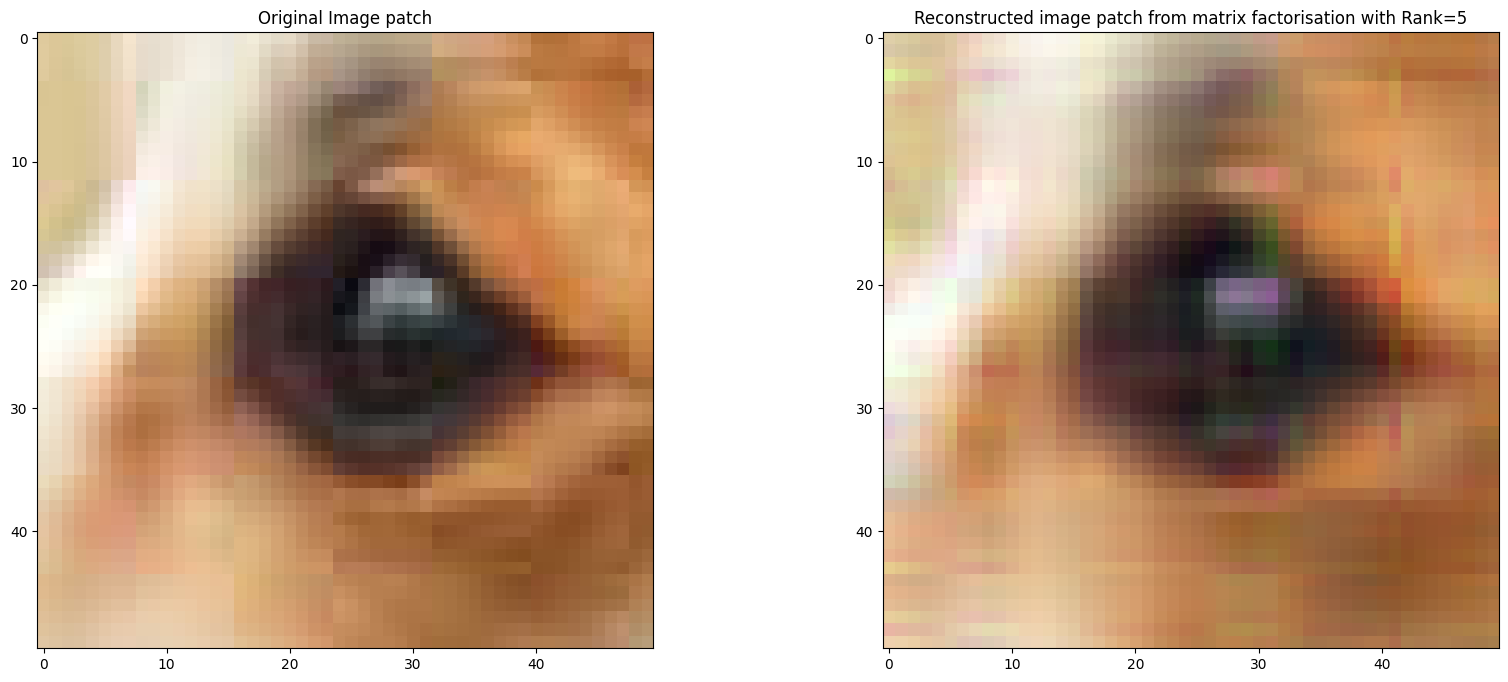

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0817337].


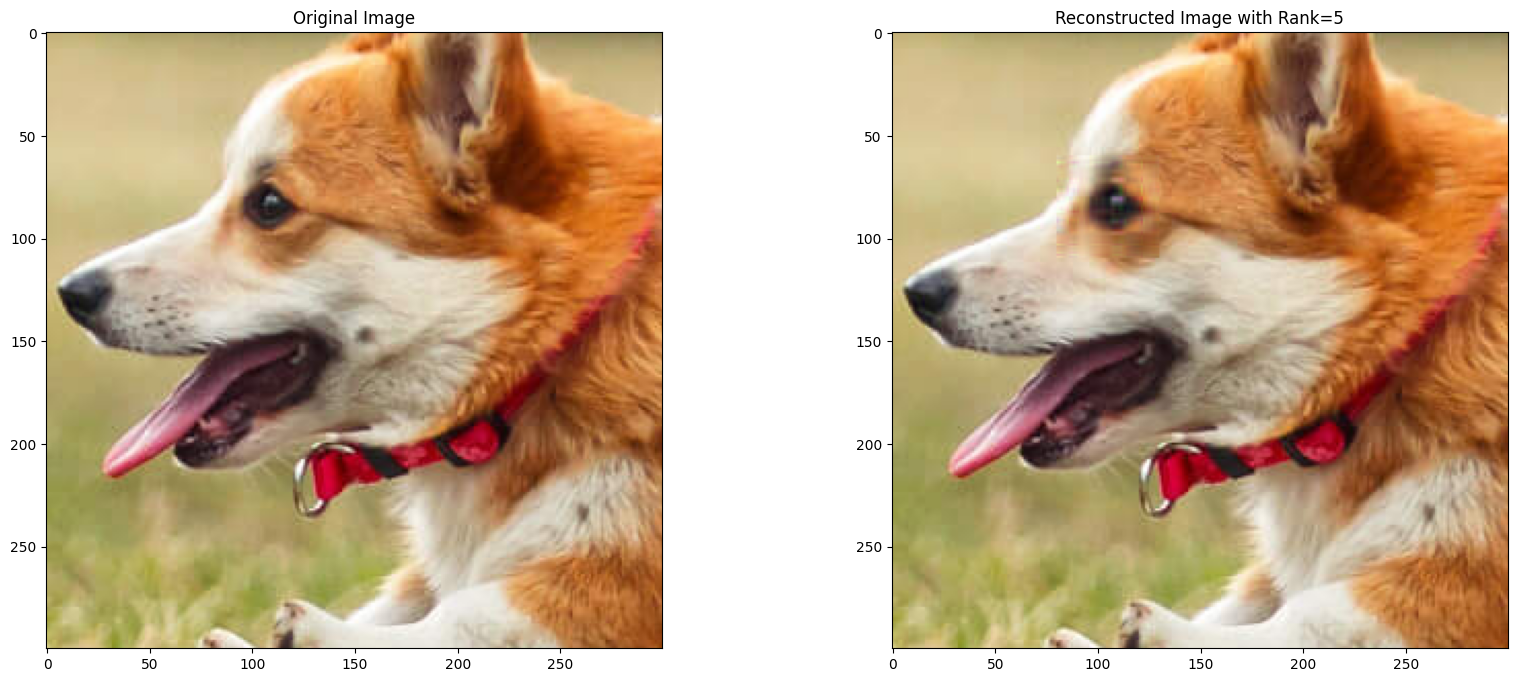

RMSE for original image patch and reconstructed image patch(Clipped): 0.035924908
PSNR for original image patch and reconstructed image patch(Clipped): 28.892086762224185


Matrix Factorisation for channel_0
0 loss: tensor(147.3787, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(1.6978, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(1.2060, grad_fn=<LinalgVectorNormBackward0>)
final loss for channel_0 is: tensor(1.0514, grad_fn=<LinalgVectorNormBackward0>)

Matrix Factorisation for channel_1
0 loss: tensor(147.9848, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(1.7552, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(1.1782, grad_fn=<LinalgVectorNormBackward0>)
1500 loss: tensor(1.0294, grad_fn=<LinalgVectorNormBackward0>)
final loss for channel_1 is: tensor(1.0273, grad_fn=<LinalgVectorNormBackward0>)

Matrix Factorisation for channel_2
0 loss: tensor(149.2368, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(1.6965, grad_fn=<LinalgVectorNormBackward0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.030047044..1.0178909].


3000 loss: tensor(0.9035, grad_fn=<LinalgVectorNormBackward0>)
final loss for channel_2 is: tensor(0.9025, grad_fn=<LinalgVectorNormBackward0>)


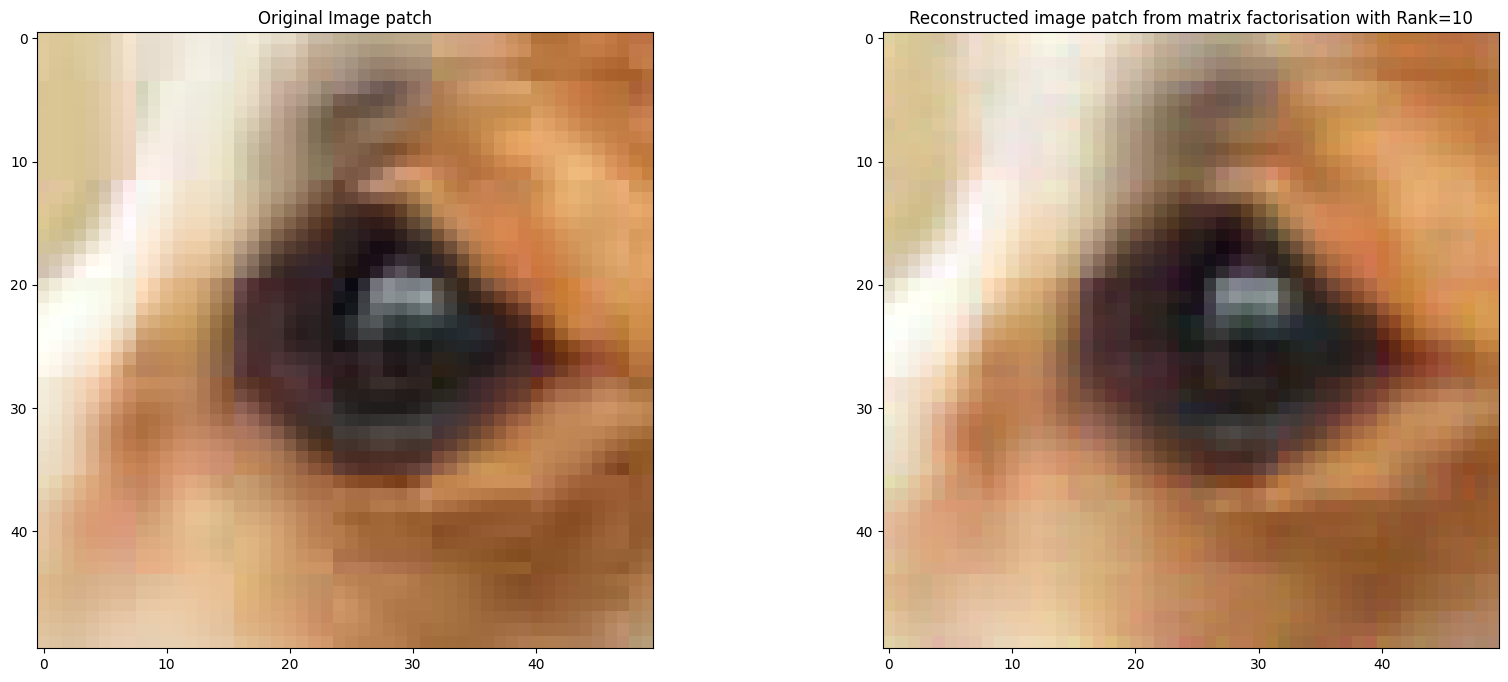

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0178909].


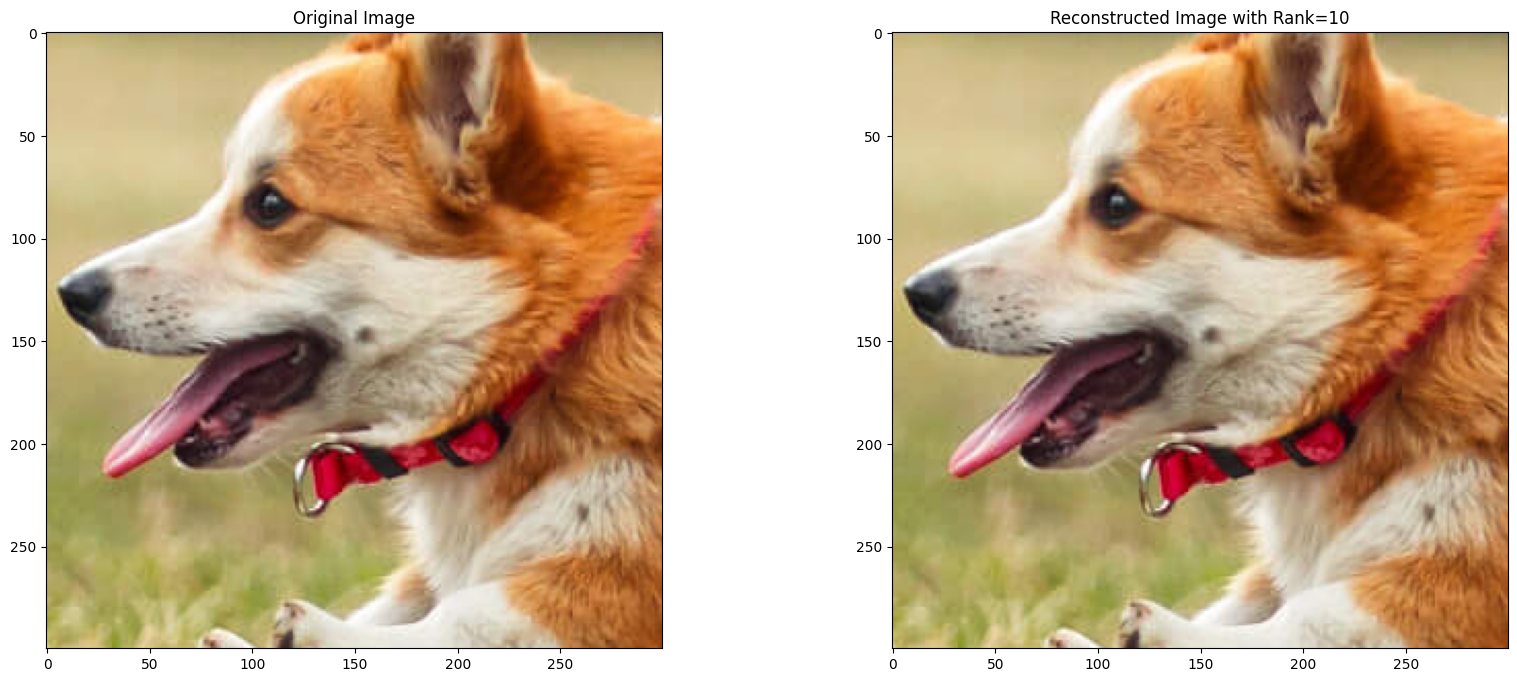

RMSE for original image patch and reconstructed image patch(Clipped): 0.01991921
PSNR for original image patch and reconstructed image patch(Clipped): 34.01455815217932


Matrix Factorisation for channel_0
0 loss: tensor(259.0918, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(0.9479, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(0.7178, grad_fn=<LinalgVectorNormBackward0>)
final loss for channel_0 is: tensor(0.6468, grad_fn=<LinalgVectorNormBackward0>)

Matrix Factorisation for channel_1
0 loss: tensor(254.7447, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(1.0376, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(0.7733, grad_fn=<LinalgVectorNormBackward0>)
1500 loss: tensor(0.6418, grad_fn=<LinalgVectorNormBackward0>)
2000 loss: tensor(0.5613, grad_fn=<LinalgVectorNormBackward0>)
2500 loss: tensor(0.5089, grad_fn=<LinalgVectorNormBackward0>)
final loss for channel_1 is: tensor(0.4775, grad_fn=<LinalgVectorNormBackward0>)

Matrix Factorisation for channel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.03981711..1.023446].


1500 loss: tensor(0.6378, grad_fn=<LinalgVectorNormBackward0>)
final loss for channel_2 is: tensor(0.6150, grad_fn=<LinalgVectorNormBackward0>)


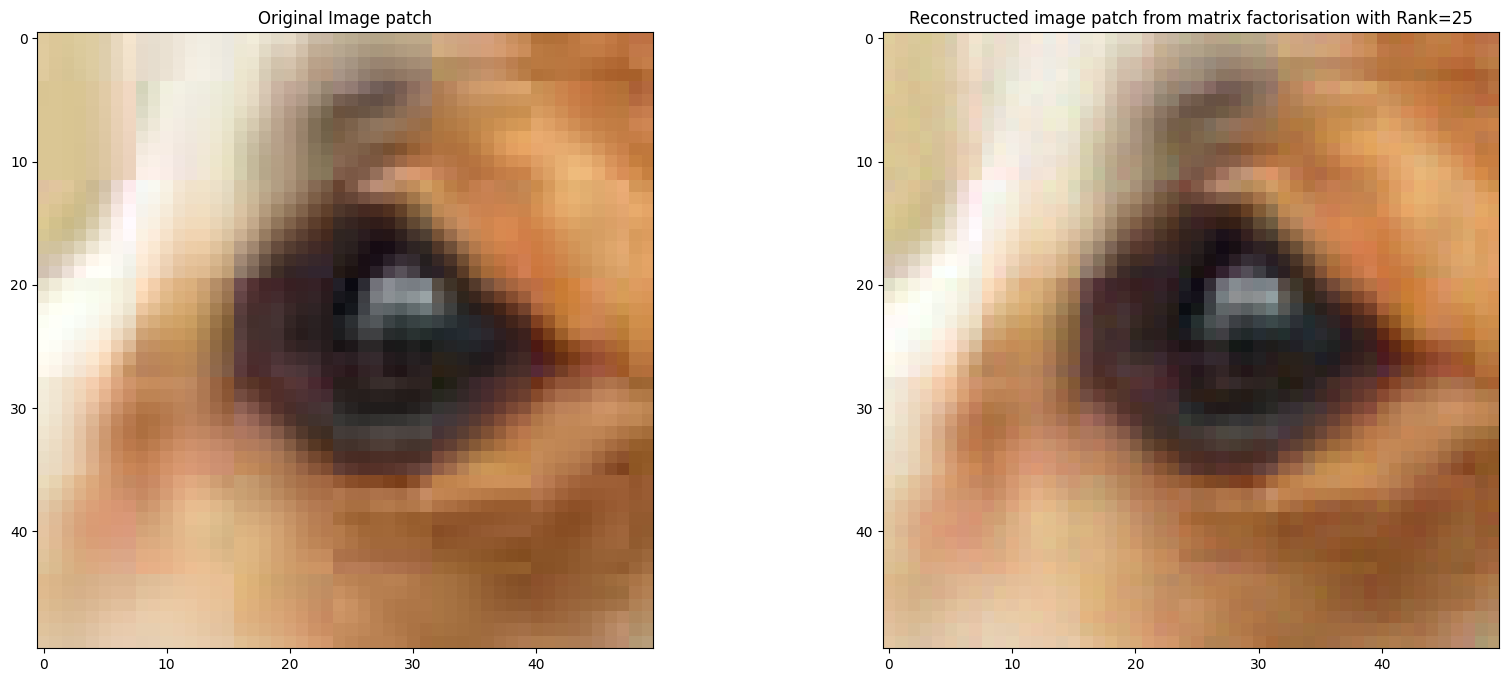

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.023446].


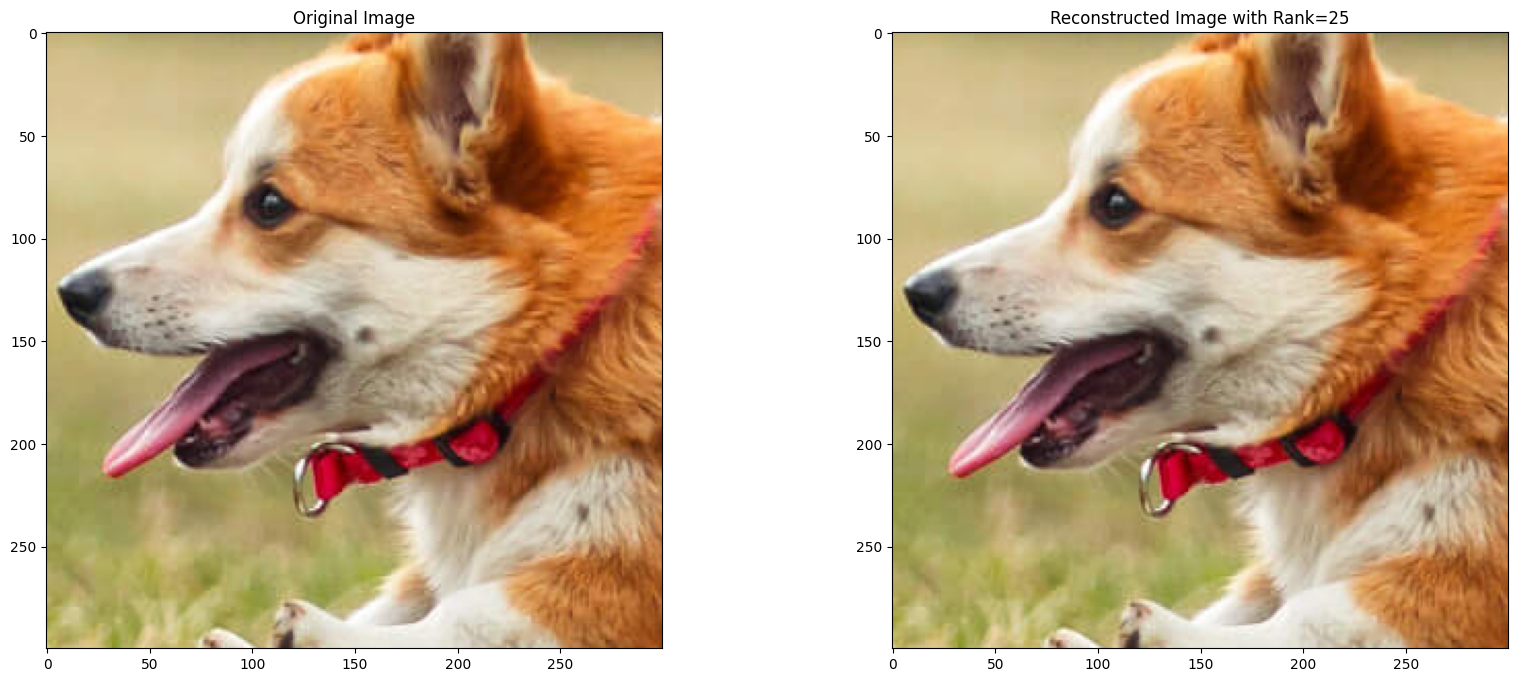

RMSE for original image patch and reconstructed image patch(Clipped): 0.011679277
PSNR for original image patch and reconstructed image patch(Clipped): 38.65168095452498


Matrix Factorisation for channel_0
0 loss: tensor(370.5176, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(0.6387, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(0.5128, grad_fn=<LinalgVectorNormBackward0>)
1500 loss: tensor(0.4609, grad_fn=<LinalgVectorNormBackward0>)
2000 loss: tensor(0.4297, grad_fn=<LinalgVectorNormBackward0>)
final loss for channel_0 is: tensor(0.4205, grad_fn=<LinalgVectorNormBackward0>)

Matrix Factorisation for channel_1
0 loss: tensor(356.4236, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(0.6795, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(0.5132, grad_fn=<LinalgVectorNormBackward0>)
final loss for channel_1 is: tensor(0.4602, grad_fn=<LinalgVectorNormBackward0>)

Matrix Factorisation for channel_2
0 loss: tensor(341.5383, grad_fn=<LinalgVectorNormBackward0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.04456499..1.0111817].


final loss for channel_2 is: tensor(0.4158, grad_fn=<LinalgVectorNormBackward0>)


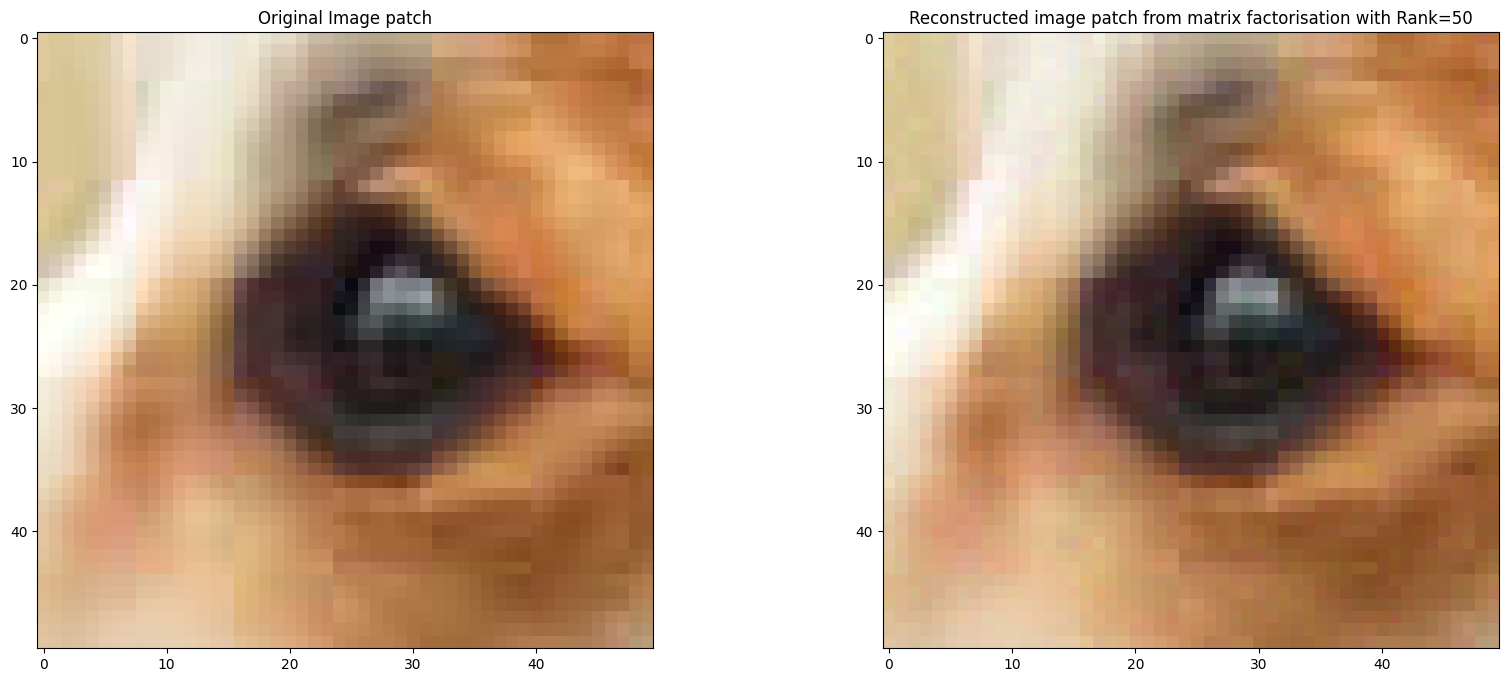

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0111817].


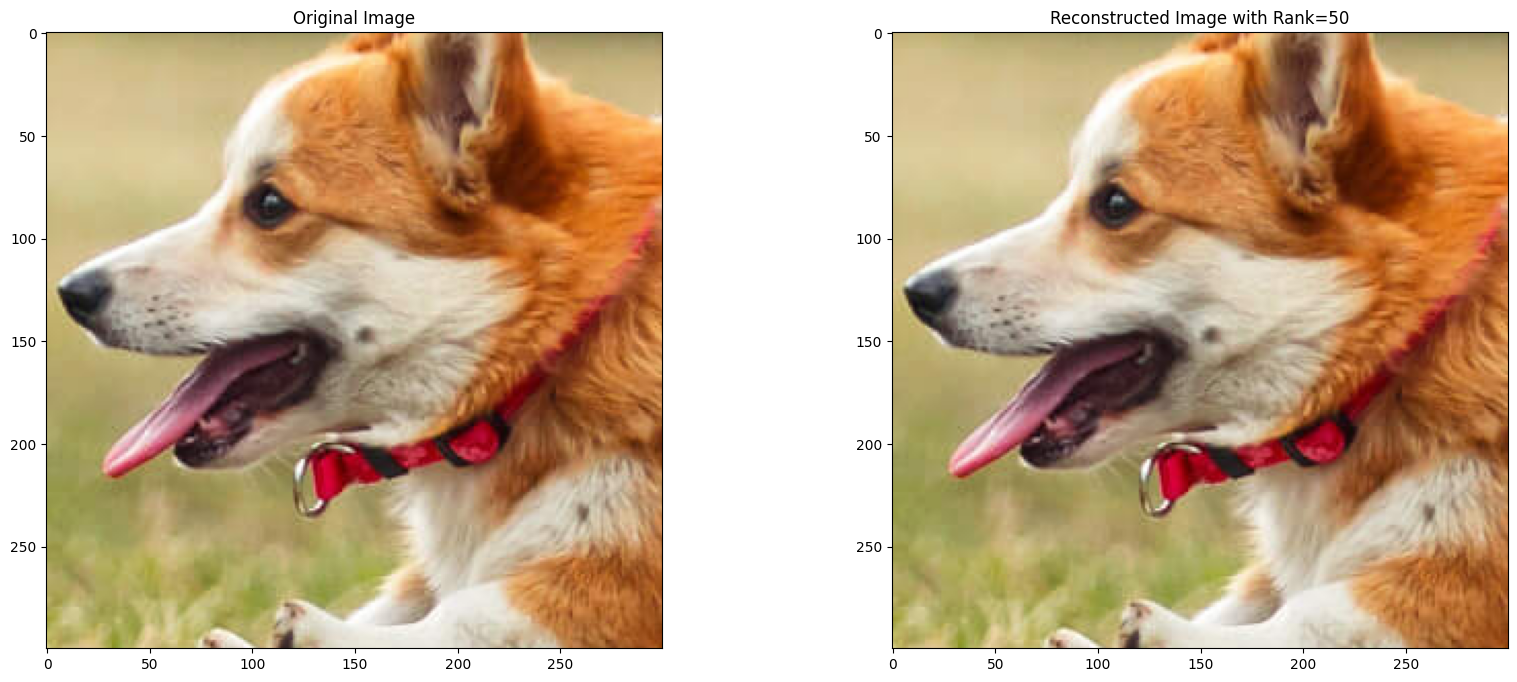

RMSE for original image patch and reconstructed image patch(Clipped): 0.008651187
PSNR for original image patch and reconstructed image patch(Clipped): 41.258486296575015



In [32]:
for r in [ 5 , 10 , 25 , 50]:
    # Image reconstruction using matrix factorization

    reconstructed_channels = []

    for i in range(3): 
        print("\nMatrix Factorisation for channel_"+str(i)) 
        channel = patch[i]
        W, H, loss = matrix_factorize(channel, r)
        reconstructed_channel = torch.mm(W, H)
        reconstructed_channels.append(reconstructed_channel)
        print("final loss for channel_"+str(i),"is:",loss)

    reconstructed_image_patch = torch.stack(reconstructed_channels)
    reconstructed_image_patch = reconstructed_image_patch.permute(1,2,0).cpu().detach().numpy()



    # W, H, loss = matrix_factorize(patch, 5)
    # print("Fianl loss:",loss)

    #Showing the original and reconstructed patches
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    plt.title(f"Original Image patch")
    plt.imshow(patch.permute(1,2,0))

    plt.subplot(1,2,2)
    plt.title(f"Reconstructed image patch from matrix factorisation with Rank={r}")
    plt.imshow(reconstructed_image_patch)

    plt.show()

    #Comparing original image to reconstructed image
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    plt.imshow(img.permute(1,2,0))
    plt.title("Original Image")

    img_reconstructed = img.clone()
    img_reconstructed = img_reconstructed.permute(1,2,0).cpu().detach().numpy()
    img_reconstructed[60:110,80:130,:] = reconstructed_image_patch

    plt.subplot(1,2,2)
    plt.imshow(img_reconstructed)
    plt.title(f"Reconstructed Image with Rank={r}")

    plt.show()

    #Printing the RMSE and PNSR values for original and reconstructed patches
    patch = patch.permute(1,2,0).cpu().detach().numpy()
    print("RMSE for original image patch and reconstructed image patch(Clipped):",rmse(patch,reconstructed_image_patch))
    rmse_array.append(rmse(patch,reconstructed_image_patch))
    print("PSNR for original image patch and reconstructed image patch(Clipped):",psnr(patch,reconstructed_image_patch))
    pnsr_array.append(psnr(patch,reconstructed_image_patch))
    print()
    patch = torch.from_numpy(patch)
    patch = patch.permute(2,0,1)


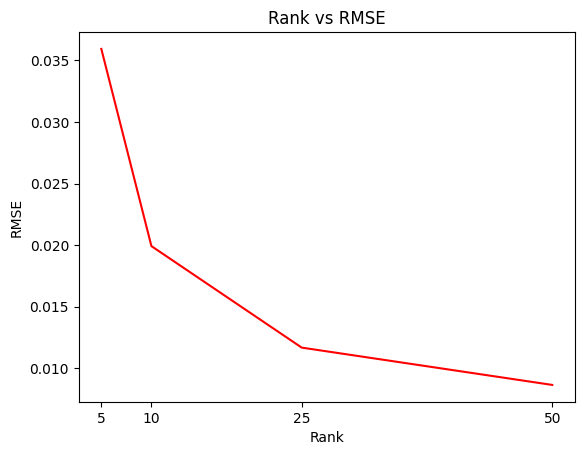

In [35]:
# Plotting rank vs RMSE
plt.title("Rank vs RMSE")
plt.xlabel("Rank")
plt.xticks([5 , 10 , 25 , 50])
plt.ylabel("RMSE")
plt.plot([5 , 10 , 25 , 50], rmse_array , color='r')
plt.show()

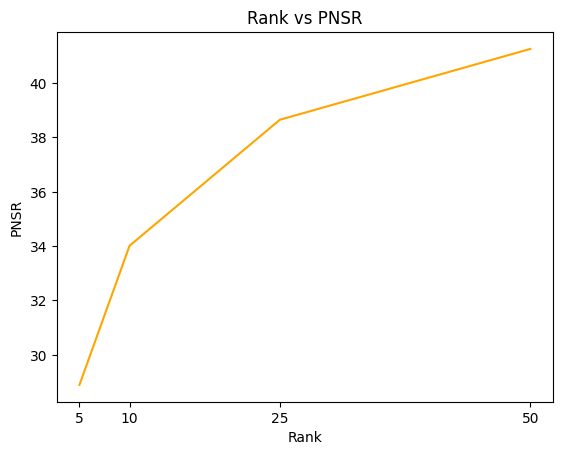

In [34]:
# Plotting rank vs PNSR
plt.title("Rank vs PNSR")
plt.xlabel("Rank")
plt.xticks([5 , 10 , 25 , 50])
plt.ylabel("PNSR")
plt.plot([5 , 10 , 25 , 50], pnsr_array , color='orange')
plt.show()